In [ ]:
pip install gensim

Download Libraries

In [ ]:
# import basic libraries
import pandas as pd
import numpy as np
import re
import nltk
import warnings
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('stopwords')
warnings.filterwarnings(action = 'ignore')
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import word2vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/Winemag_150k.csv')

In [ ]:
wine_data.head()

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
wine_data['description'][0]

'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'

We are concerned aboutthe description only, Goal is to only vectorize the description

we can vectorize using Word2Rec, apart from Count Vectorizer or TFvectorizer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
# function to clean text
def review_to_words(raw_review):

    # 1. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)

   # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()


    # 3. Remove Stopwords. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))


    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops] #returns a list


    # 5. Stem words. Need to define porter stemmer above
    singles = [stemmer.stem(word) for word in meaningful_words]

    # 6. Join the words back into one string separated by space , and return the result.
    return( " ".join( singles ))

In [ ]:
# applying it to our text data
# dataset is named wine_data and the text are in the column "description"
processed_wmn = [review_to_words(text) for text in wine_data.description]
#This will take sometime.

In [ ]:
processed_wmn[0:5]

['tremend variet wine hail oakvil age three year oak juici red cherri fruit compel hint caramel greet palat frame eleg fine tannin subtl minti tone background balanc reward start finish year ahead develop nuanc enjoy',
 'ripe aroma fig blackberri cassi soften sweeten slather oaki chocol vanilla full layer intens cushion palat rich flavor chocolati black fruit bake spice toasti everlast finish headi ideal balanc drink',
 'mac watson honor memori wine made mother tremend delici balanc complex botrytis white dark gold color layer toast hazelnut pear compot orang peel flavor revel succul g l residu sugar',
 'spent month new french oak incorpor fruit ponzi aurora abetina madrona vineyard among other aromat dens toasti deftli blend aroma flavor toast cigar box blackberri black cherri coffe graphit tannin polish fine sheen frame finish load dark chocol espresso drink',
 'top wine la b gude name highest point vineyard feet structur densiti consider acid still calm month wood wine develop extra

In [ ]:
# Building a corpus for the word2vec model.
def build_corpus(data):

    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)

    return corpus

corpus = build_corpus(processed_wmn)

In [ ]:
corpus[-1]

['pinot',
 'grigio',
 'tast',
 'like',
 'rich',
 'pear',
 'like',
 'nose',
 'follow',
 'crisp',
 'acid',
 'medium',
 'bodi',
 'viscou',
 'mouthfeel',
 'finish',
 'long',
 'redol',
 'pear',
 'citru']

Building the Word2vec Model

In [ ]:
# run the model
model = word2vec.Word2Vec(corpus, vector_size=100, window=5, min_count=1000, workers = 4)
model

- **We can see how many words were used in our model vocabulary with the command:  `len(model.wv.vocab)`.**

In [ ]:
len(model.wv.key_to_index)

592

In [ ]:
[x for x in model.wv.key_to_index][0:5]

['wine', 'flavor', 'fruit', 'finish', 'acid']

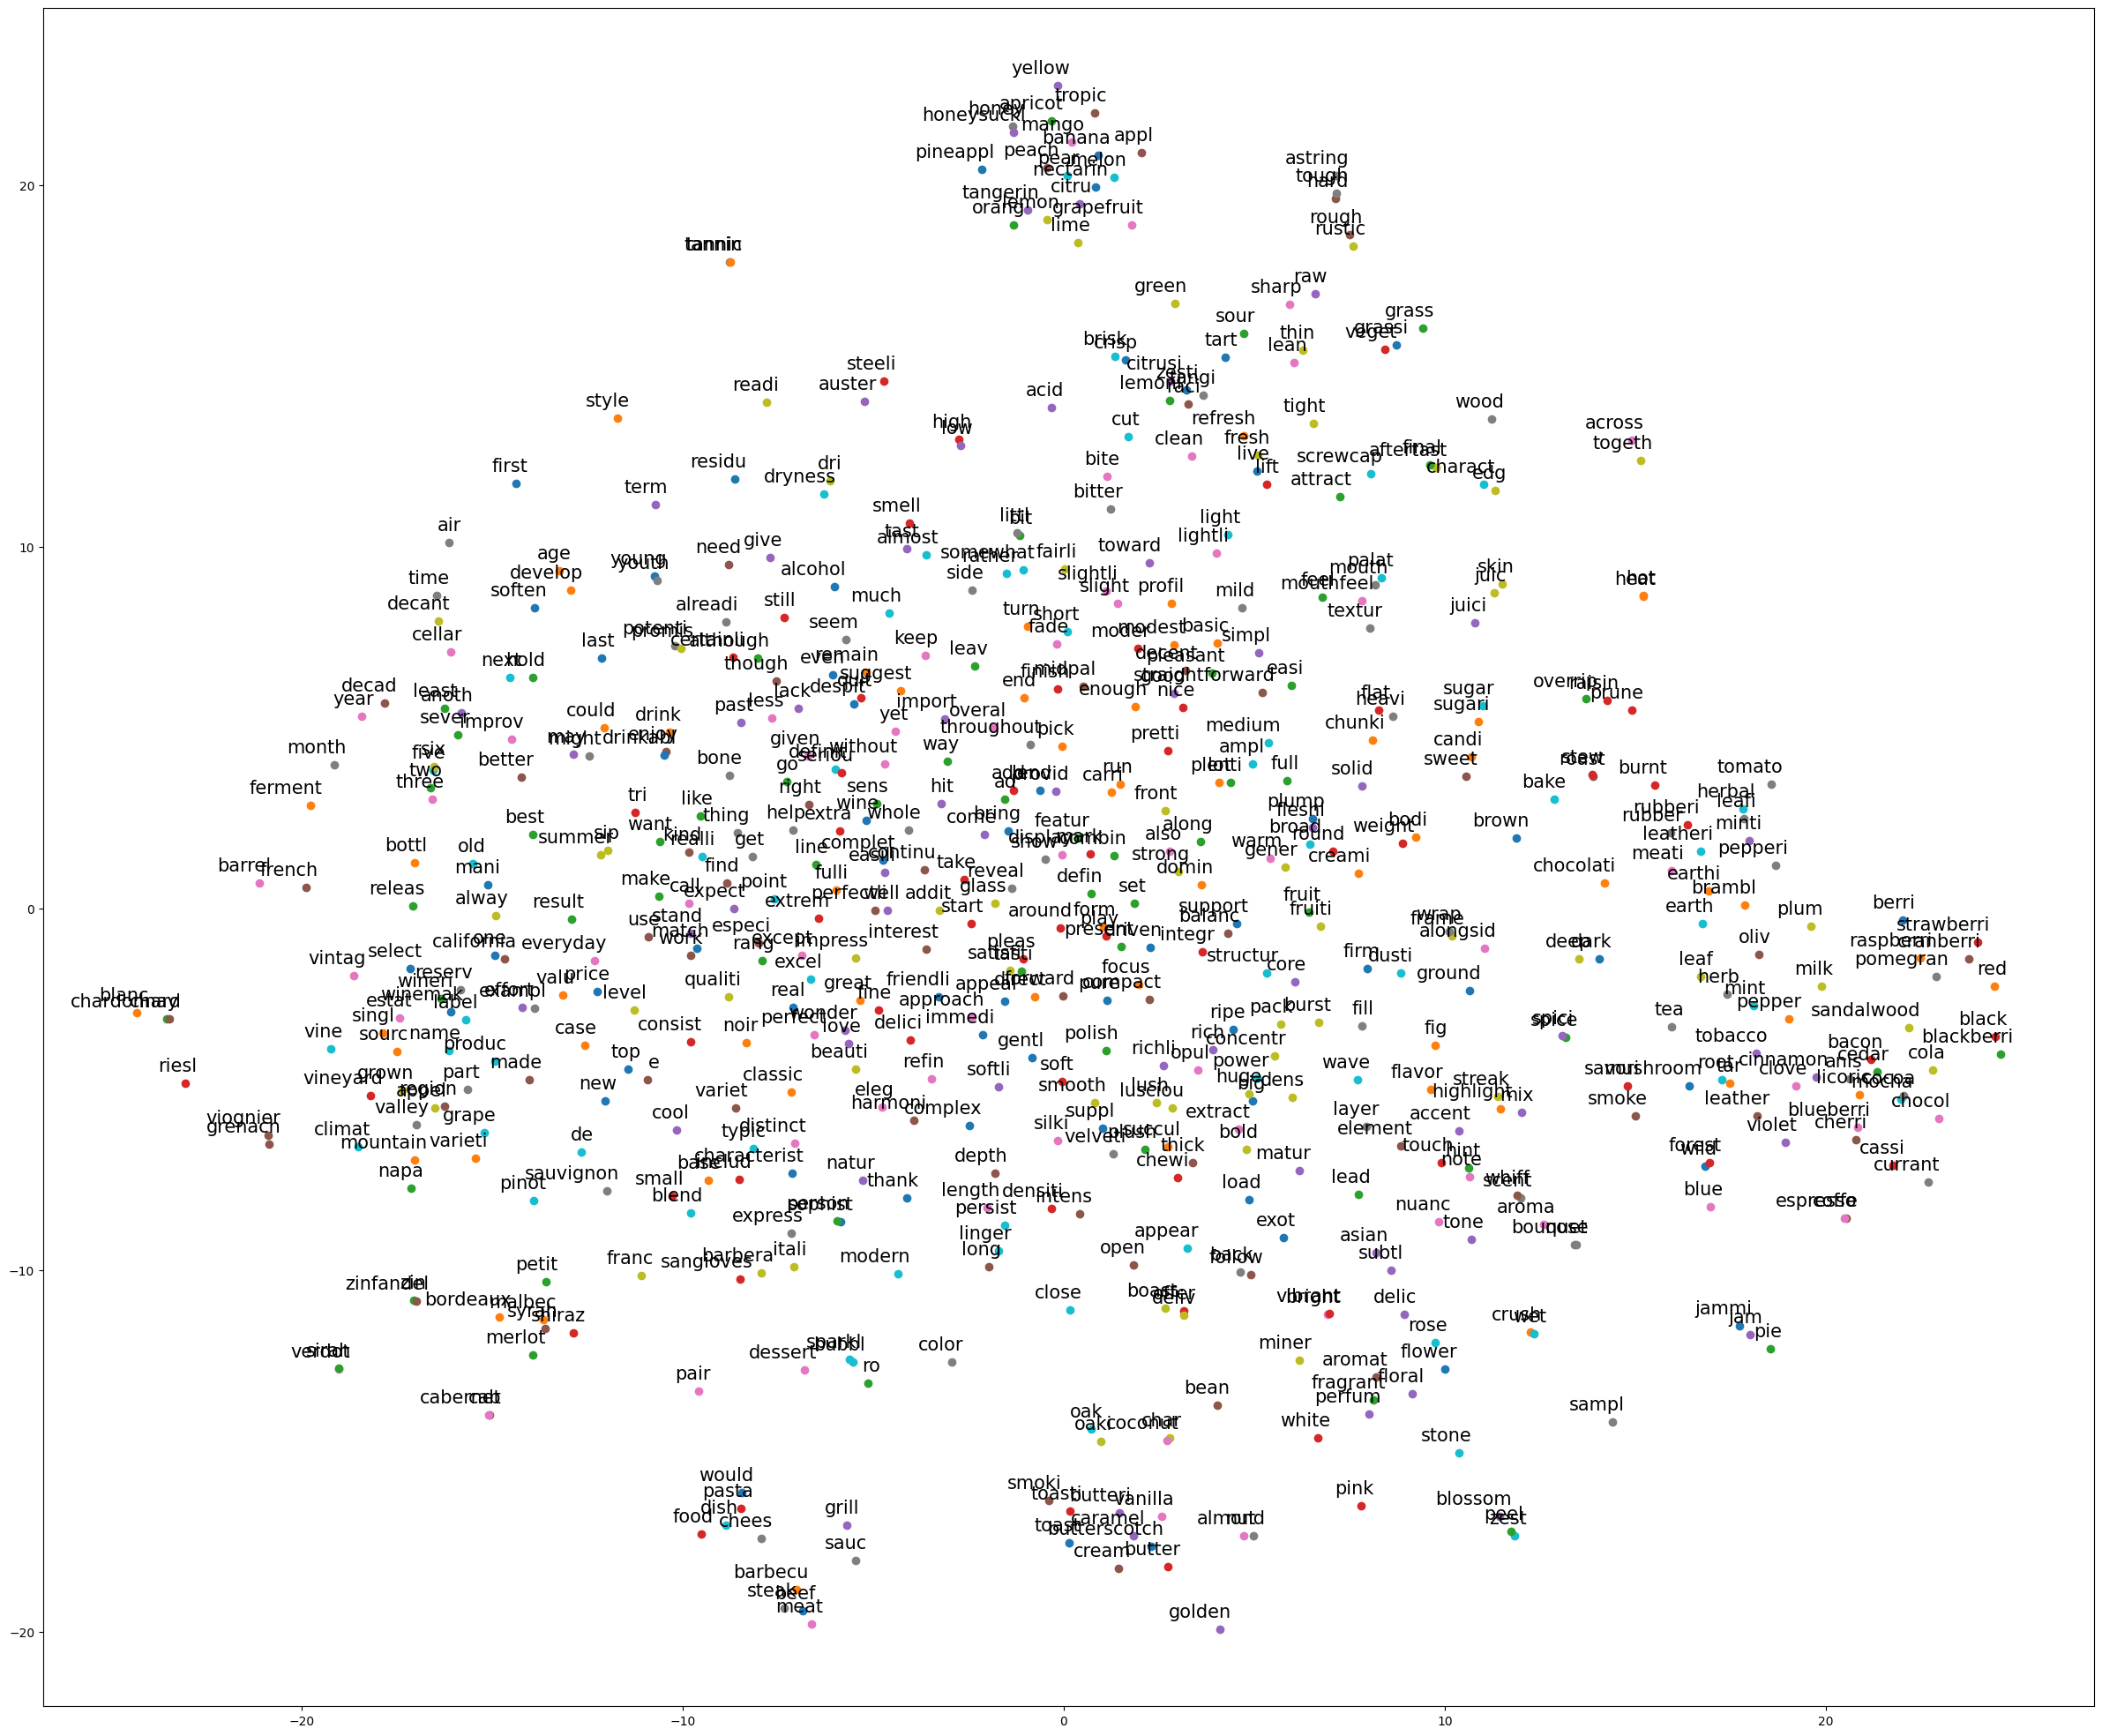

In [ ]:
# define the function to compute the dimensionality reduction and then produce the biplot
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)

    # Convert the list of tokens to a NumPy array
    tokens = np.array(tokens)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(30,25))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 7),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',size = 15)
    plt.show()

# call the function on our dataset
tsne_plot(model)